## 모델 성능 향상
* 포도로 만든 와인은 고대 그리스 로마 시대부터 서양 음식의 기본이 된 오랜 양조주
* 와인은 빛깔에 따라 맑고 투명한 화이트 와인과 붉은색을 띠는 레드 와인으로 구분
    + 포르투갈 서북쪽 대서양과 맞닿아 있는 비뉴 베르드(Vinho Verde) 지방에서 만들어진 와인을 측정한 데이터
* 레드 와인 샘플 1,599개를 등급과 맛, 산도를 측정해 분석하고 
* 화이트 와인 샘플 4,898개를 마찬가지로 분석해 데이터를 만둚
    + 레드 와인과 화이트 와인을 구분하는 실험

## 탐색적 분석

In [1]:
import pandas as pd

In [2]:
# 와인 데이터를 불러옵니다.
df = pd.read_csv('data/rw_wine.csv', header=None)

# 데이터를 미리 보겠습니다.
# 주석산 농도, 아세트산 농도 구연산 농도 잔류 당분 농도
# 염화나트륨 농도 유리 아황산 농도 총 아황산 농도 밀도 pH
# 황산칼륨 농도 알코올 도수 와인의 맛(0~10등급)
# 클래스(1: 레드 와인, 0: 화이트 와인)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [3]:
# 0~11번째 열에 해당하는 속성 12개를 X로, 13번째 열을 y로 정하겠습니다.
X = df.iloc[:,0:12]
y = df.iloc[:,12]

## 데이터 분석

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

C:\Java\miniconda3\envs\.py39\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [5]:
# 학습셋과 테스트셋으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# 모델 구조를 설정합니다.
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                390       
                                                                 
 dense_1 (Dense)             (None, 12)                372       
                                                                 
 dense_2 (Dense)             (None, 8)                 104       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


In [6]:
# 모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', 
metrics=['accuracy'])

In [7]:
# 모델을 실행합니다.
history = model.fit(X_train, y_train, epochs=50, batch_size=500, 
validation_split=0.25, verbose=False) # 0.8 x 0.25 = 0.2

C:\Users\LG PC\AppData\Roaming\Python\Python39\site-packages\keras\engine\data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


In [8]:
# 테스트 결과를 출력합니다.
score = model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 [==============================] - 0s 1ms/step - loss: 0.1656 - accuracy: 0.9362
Test accuracy: 0.9361538290977478


## 모델 업데이트하기
* 만일 50번의 에포크 중 최적의 학습이 40번째에 이루어졌다면, 
* 어떻게 해서 40번째 모델을 불러와 사용할 수 있을까요?

In [37]:
from tensorflow.keras.callbacks import ModelCheckpoint

modelpath = "./data/model/all/{epoch:02d}-{val_accuracy:.4f}.hdf5"

# 학습 중인 모델을 저장하는 함수는 케라스 API의 ModelCheckpoint()
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=0)

# 모델을 실행합니다. - .8로 나눈 데이터셋을 .75 와 .25로 나눈후 학습과 검증 실행
history = model.fit(X_train, y_train, epochs=50, batch_size=500, 
validation_split=0.25, verbose=0, callbacks=[checkpointer])

# 테스트 결과를 출력합니다.
score = model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

C:\Users\LG PC\AppData\Roaming\Python\Python39\site-packages\keras\engine\data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


41/41 [==============================] - 0s 1ms/step - loss: 0.0772 - accuracy: 0.9838
Test accuracy: 0.983846127986908


## 그래프로 과적합 확인
* 학습의 반복 횟수가 너무 적으면 데이터셋의 패턴을 충분히 파악하지 못합니다. 
* 하지만 학습을 너무 많이 반복하는 것도 좋지 않습니다. 
* 적절한 학습 횟수를 정하기 위해서는 검증셋과 테스트셋의 결과를 
  그래프로 보는 것이 가장 좋습니다

In [38]:
# loss는 학습을 통해 구한 예측 값과 실제 값의 차이(=오차)를 의미하고 
# accuracy는 전체 샘플 중에서 정답을 맞춘 샘플이 몇 개인지의 비율(=정확도)을 의미하지요.
# 검증셋을 지정하면 val_loss가 함께 출력됩니다. 
# 이때 metrics를 accuracy로 지정하면 accuracy와 함께 val_accuracy 값도 출력됩니다. 
# val_loss는 학습한 모델을 검증셋에 적용해 얻은 오차이고, 
# val_accuracy는 검증셋으로 얻은 정확도

history = model.fit(X_train, y_train, epochs=1000, 
                    batch_size=500, validation_split=0.25, verbose=False)

C:\Users\LG PC\AppData\Roaming\Python\Python39\site-packages\keras\engine\data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


In [39]:
# history는 model.fit()의 결과를 가진 파이썬 객체로, 
# history.params에는 model.fit()의 설정 값들이, 
# history.epoch에는 에포크 정보
# 우리에게 필요한 loss, accuracy, val_loss, val_accuracy는 
# history.history에 들어 있습니다
hist_df = pd.DataFrame(history.history)
hist_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.012900,0.995381,0.082630,0.984615
1,0.014647,0.993841,0.079772,0.985385
2,0.013976,0.994098,0.087589,0.986154
3,0.016085,0.993841,0.078611,0.985385
4,0.012495,0.995124,0.081081,0.985385


In [40]:
# 학습한 모델을 검증셋에 적용해 얻은 오차(val_loss)는 y_vloss에 저장하고 
# 학습셋에서 얻은 오차(loss)는 y_loss에 저장
y_vloss = hist_df['val_loss']
y_loss = hist_df['loss']

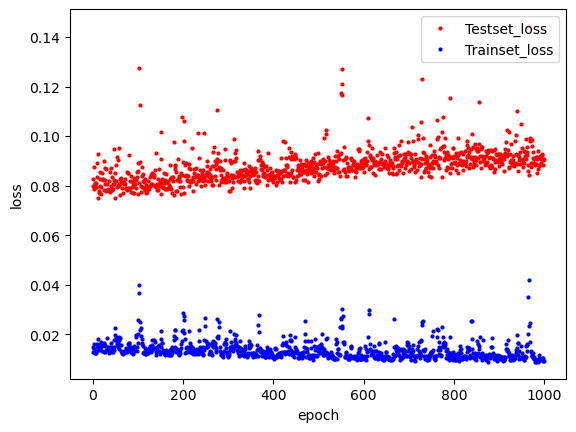

In [41]:
# 학습셋에서 얻은 오차는 빨간색으로, 검증셋에서 얻은 오차는 파란색으로 표시
# 학습이 오래 진행될수록 검증셋의 오차(파란색)는 줄어들지만 
# 테스트셋의 오차(빨간색)는 다시 커진다는 것입니다. 
# 이는 과도한 학습으로 과적합이 발생했기 때문입니다. 
# 이러한 사실을 통해 알 수 있는 것은 검증셋 오차가 커지기 직전까지 
# 학습한 모델이 최적의 횟수로 학습한 모델

import numpy as np
import matplotlib.pyplot as plt

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, "o", c="red", markersize=2, label='Testset_loss')
plt.plot(x_len, y_loss, "o", c="blue", markersize=2, label='Trainset_loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [42]:
y_vacc = hist_df['val_accuracy']
y_acc = hist_df['accuracy']

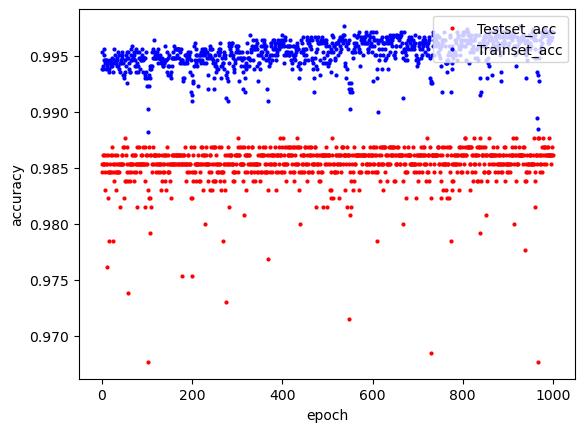

In [43]:
# 학습셋에서 얻은 오차는 빨간색으로, 검증셋에서 얻은 오차는 파란색으로 표시
# 학습이 오래 진행될수록 검증셋의 오차(파란색)는 줄어들지만 
# 테스트셋의 오차(빨간색)는 다시 커진다는 것입니다. 
# 이는 과도한 학습으로 과적합이 발생했기 때문입니다. 
# 이러한 사실을 통해 알 수 있는 것은 검증셋 오차가 커지기 직전까지 
# 학습한 모델이 최적의 횟수로 학습한 모델

x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vacc, "o", c="red", markersize=2, label='Testset_acc')
plt.plot(x_len, y_acc, "o", c="blue", markersize=2, label='Trainset_acc')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

## 학습의 자동 중단
* 텐서플로에 포함된 케라스 API는 EarlyStopping() 함수를 제공합니다. 
* 학습이 진행되어도 테스트셋 오차가 줄어들지 않으면 학습을 자동으로 멈추게 하는 함수

In [46]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# 학습이 언제 자동 중단될지 설정합니다.
# monitor 옵션은 model.fit()의 실행 결과 중 어떤 것을 이용할지 정합니다. 
# 검증셋의 오차(val_loss)로 지정
# patience 옵션은 지정된 값이 몇 번 이상 향상되지 않으면 학습을 종료시킬지 정합
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

# 최적화 모델이 저장될 폴더와 모델 이름을 정합니다.
modelpath = "data/model/Ch14-4-bestmodel.hdf5"

# 최적화 모델을 업데이트하고 저장합니다.
# 최고의 모델 하나만 저장
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)

# 모델을 실행합니다.
history = model.fit(X_train, y_train, epochs=2000, batch_size=500, 
                    validation_split=0.25, verbose=1, callbacks=[early_stopping_callback, checkpointer])

Epoch 1/2000
1/8 [==>...........................] - ETA: 0s - loss: 0.0069 - accuracy: 0.9980

C:\Users\LG PC\AppData\Roaming\Python\Python39\site-packages\keras\engine\data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


8/8 [==============================] - 0s 20ms/step - loss: 0.0098 - accuracy: 0.9964 - val_loss: 0.0907 - val_accuracy: 0.9869
Epoch 2/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0091 - accuracy: 0.9972 - val_loss: 0.0918 - val_accuracy: 0.9862
Epoch 3/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.0088 - accuracy: 0.9969 - val_loss: 0.0934 - val_accuracy: 0.9869
Epoch 4/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.0093 - accuracy: 0.9964 - val_loss: 0.0881 - val_accuracy: 0.9877
Epoch 5/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.0092 - accuracy: 0.9977 - val_loss: 0.0898 - val_accuracy: 0.9869
Epoch 6/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0085 - accuracy: 0.9964 - val_loss: 0.0934 - val_accuracy: 0.9854
Epoch 7/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.0090 - accuracy: 0.9967 - val_loss: 0.0894 - val_accuracy: 0.9862
Epoch 8/2000
8/8 [============

In [47]:
len(history.history['accuracy'])

29

In [48]:
score = model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 [==============================] - 0s 2ms/step - loss: 0.0893 - accuracy: 0.9854
Test accuracy: 0.9853846430778503
